In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import random
import numpy as np
import random

In [2]:
batch_size = 50

In [3]:
def print_board(board):
    symbols = ['O', ' ', 'X']
    board_plus1 = [int(x) + 1 for x in board]
    print(' ' + symbols[board_plus1[0]] + ' | ' + symbols[board_plus1[1]] + ' | ' + symbols[board_plus1[2]])
    print('____________')
    print(' ' + symbols[board_plus1[3]] + ' | ' + symbols[board_plus1[4]] + ' | ' + symbols[board_plus1[5]])
    print('____________')
    print(' ' + symbols[board_plus1[6]] + ' | ' + symbols[board_plus1[7]] + ' | ' + symbols[board_plus1[8]])

In [4]:
def get_symmetry(board, response, transformation):
    if transformation == 'rotate180':
        new_response = 8 - response
        return board[::-1], new_response
    elif transformation == 'rotate90':
        new_response = [6, 3, 0, 7, 4, 1, 8, 5, 2].index(response)
        tuple_board = list(zip(*[board[6: 9], board[3: 6], board[0: 3]]))
        return [value for item in tuple_board for value in item], new_response
    elif transformation == 'rotate270':
        new_response = [2, 5, 8, 1, 4, 7, 0, 3, 6].index(response)
        tuple_board = list(zip(*[board[0: 3], board[3: 6], board[6: 9]]))[::-1]
        return [value for item in tuple_board for value in item], new_response
    elif transformation == 'flip_v':
        new_response = [6, 7, 8, 3, 4, 5, 0, 1, 2].index(response)
        return board[6: 9] + board[3: 6] + board[0: 3], new_response
    elif transformation == 'flip_h':
        new_response = [2, 1, 0, 5, 4, 3, 8, 7, 6].index(response)
        new_board = board[::-1]
        return new_board[6: 9] + new_board[3: 6] + new_board[0: 3], new_response
    elif transformation == 'original_v':
        return board, response
    else:
        raise ValueError('Method not implemented.')

In [5]:
def get_moves_from_csv(csv_file):
    moves = []
    with open(csv_file, 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            moves.append(([int(x) for x in row[0: 9]], int(row[9])))
    return moves

In [6]:
def get_rand_move(moves, rand_transforms=2):
    board, response = random.choice(moves)
    possible_transforms = ['rotate90', 'rotate180', 'rotate270', 'flip_v', 'flip_h', 'original_v']
    for i in range(rand_transforms):
        random_transform = random.choice(possible_transforms)
        board, response = get_symmetry(board, response, random_transform)
    return board, response

In [7]:
sess = tf.Session()
moves = get_moves_from_csv('base_tic_tac_toe_moves.csv')
train_length = 50
train_set = []
for t in range(train_length):
    train_set.append(get_rand_move(moves))

In [8]:
print(train_set)
test_board = [-1, 0, 0, 1, -1, -1, 0, 0, 1]
train_set = [x for x in train_set if x[0] != test_board]

[([0, -1, 1, -1, 0, 0, 0, 0, 0], 8), ([0, 0, 0, -1, 0, 0, 0, 0, 0], 8), ([-1, 0, 0, 0, 0, 0, 0, 0, 0], 4), ([0, 0, -1, -1, 1, 0, 1, -1, 0], 0), ([1, 0, -1, 0, -1, 0, 0, 0, 0], 6), ([0, 0, 0, 0, -1, 0, 0, 0, 0], 2), ([1, -1, 0, 0, -1, 0, 0, 1, -1], 6), ([1, -1, 0, 0, -1, 0, 0, 0, 0], 7), ([0, -1, 0, 0, 0, 0, 0, 0, 0], 6), ([0, -1, 0, 0, 0, 0, 0, 0, 0], 0), ([0, 0, 0, 0, 0, -1, 0, -1, 1], 1), ([-1, 1, -1, 0, 1, 0, 0, 1, 0], 8), ([1, 0, 0, 0, -1, 0, 0, 0, -1], 6), ([-1, 0, 1, 1, -1, -1, 0, 0, 0], 8), ([0, 0, -1, 1, 1, 1, 0, 0, -1], 0), ([0, -1, 1, 0, 0, 0, 0, 0, -1], 4), ([-1, 0, 1, 0, 0, -1, 0, 0, 0], 4), ([-1, -1, 1, 0, 0, 0, 0, 0, 0], 5), ([0, -1, 0, -1, -1, 1, 1, 0, 0], 7), ([0, -1, 1, 1, 0, -1, -1, 0, 0], 7), ([1, -1, 0, -1, -1, 1, 0, 0, 0], 7), ([-1, -1, 1, 0, 0, 0, 0, 0, 0], 5), ([0, 0, -1, 0, -1, 0, 1, 0, 0], 8), ([1, 0, -1, -1, 0, 0, 0, 0, 0], 4), ([0, 0, 0, 0, 0, 0, 0, 0, -1], 4), ([0, -1, 0, 0, -1, 0, 1, 1, -1], 0), ([1, -1, 1, 0, -1, 0, 0, 0, -1], 7), ([1, 0, -1, -1, -1, 1, 0,

In [9]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape))

def model(X, A1, A2, bias1, bias2):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, A1), bias1))
    layer2 = tf.add(tf.matmul(layer1, A2), bias2)
    return layer2

In [10]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 9])
Y = tf.placeholder(dtype=tf.int32, shape=[None])
A1 = init_weights([9, 81])
bias1 = init_weights([81])
A2 = init_weights([81, 9])
bias2 = init_weights([9])
model_output = model(X, A1, A2, bias1, bias2)

In [11]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model_output, labels=Y))
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)
prediction = tf.argmax(model_output, 1)

In [12]:
init = tf.global_variables_initializer()
sess.run(init)
loss_vec = []
for i in range(10000):
    rand_indices = np.random.choice(range(len(train_set)), batch_size, replace=False)
    batch_data = [train_set[i] for i in rand_indices]
    x_input = [x[0] for x in batch_data]
    y_target = [y[1] for y in batch_data]
    sess.run(train_step, feed_dict={X: x_input, Y: y_target})
    temp_loss = sess.run(loss, feed_dict={X: x_input, Y: y_target})
    loss_vec.append(temp_loss)
    if i % 500 == 0:
        print('iteration ' + str(i) + ' Loss: ' + str(temp_loss))

iteration 0 Loss: 7.2076583
iteration 500 Loss: 1.3090985
iteration 1000 Loss: 0.88049316
iteration 1500 Loss: 0.69749177
iteration 2000 Loss: 0.5767709
iteration 2500 Loss: 0.4884966
iteration 3000 Loss: 0.42185447
iteration 3500 Loss: 0.37054113
iteration 4000 Loss: 0.33034447
iteration 4500 Loss: 0.29835984
iteration 5000 Loss: 0.27254355
iteration 5500 Loss: 0.25143087
iteration 6000 Loss: 0.23395452
iteration 6500 Loss: 0.21932587
iteration 7000 Loss: 0.2069542
iteration 7500 Loss: 0.19639179
iteration 8000 Loss: 0.18729557
iteration 8500 Loss: 0.17939942
iteration 9000 Loss: 0.17249477
iteration 9500 Loss: 0.16641657


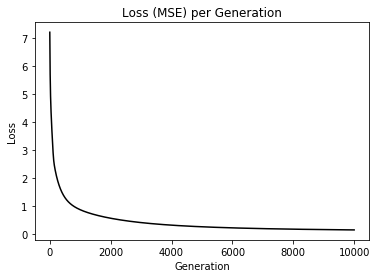

In [13]:
plt.plot(loss_vec, 'k-', label='Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

In [14]:
test_boards = [test_board]
feed_dict = {X: test_boards}
logits = sess.run(model_output, feed_dict=feed_dict)
predictions = sess.run(prediction, feed_dict=feed_dict)
print(predictions)

[6]


In [21]:
def check(board):
    wins = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]
    for i in range(len(wins)):
        if board[wins[i][0]] == board[wins[i][1]] == board[wins[i][2]] == 1:
            return 1
        elif board[wins[i][0]] == board[wins[i][1]] == board[wins[i][2]] == -1:
            return 1
    return 0

In [22]:
game_tracker = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
win_logical = False
num_moves = 0
while not win_logical:
    player_index = input('Input index of your move (0-8): ')
    num_moves += 1
    game_tracker[int(player_index)] = 1
    [potential_moves] = sess.run(model_output, feed_dict={X: [game_tracker]})
    allowed_moves = [ix for ix, x in enumerate(game_tracker) if x == 0.0]
    model_move = np.argmax([x if ix in allowed_moves else -999.0 for ix, x in enumerate(potential_moves)])
    
    game_tracker[int(model_move)] = -1.0
    print('Model has moved')
    print_board(game_tracker)
    if check(game_tracker) == 1 or num_moves >= 5:
        print('Game Over!')
        win_logical = True

Input index of your move (0-8): 5
Model has moved
 O |   |  
____________
   |   | X
____________
   |   |  
Input index of your move (0-8): 4
Model has moved
 O | O |  
____________
   | X | X
____________
   |   |  
Input index of your move (0-8): 3
Model has moved
 O | O |  
____________
 X | X | X
____________
 O |   |  
Game Over!
